In [9]:
import sympy
import numpy as np
from einsteinpy.symbolic import *
from einsteinpy.symbolic.predefined import *

sympy.init_printing()

### Polar

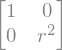

In [20]:
r, theta = sympy.symbols('r theta')
metric = [[1, 0], [0, r**2]]
g = MetricTensor(metric, (r, theta))
g.tensor()

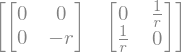

In [21]:
christoffel = ChristoffelSymbols.from_metric(g)
christoffel.tensor()

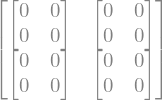

In [22]:
riemann = RiemannCurvatureTensor.from_metric(g)
riemann.tensor()

### Minkowski

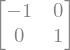

In [34]:
syms = sympy.symbols('t x')
metric = [[-1, 0], [0, 1]]
g = MetricTensor(metric, syms)
g.tensor()

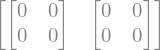

In [35]:
christoffel = ChristoffelSymbols.from_metric(g)
christoffel.tensor()

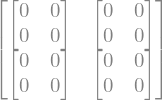

In [36]:
riemann = RiemannCurvatureTensor.from_metric(g)
riemann.tensor()

In [39]:
g.symbols()

### Spherical

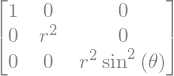

In [8]:
syms = sympy.symbols('r theta phi')
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
metric[0][0] = 1
metric[1][1] = syms[0]**2
metric[2][2] = (syms[0]**2)*(sympy.sin(syms[1])**2)
# creating metric object
m_obj = MetricTensor(metric, syms)
m_obj.tensor()

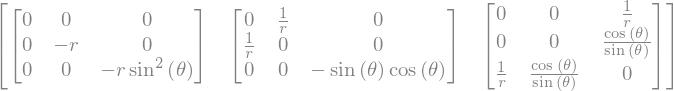

In [3]:
ch = ChristoffelSymbols.from_metric(m_obj)
ch.tensor()

In [4]:
ch.tensor()[1,1,0]

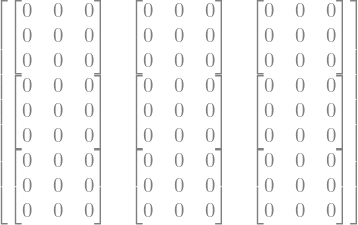

In [5]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

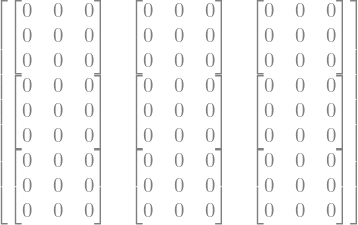

In [6]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(m_obj)
rm2.tensor()

### Schwarzchild

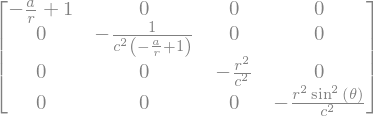

In [12]:
syms = sympy.symbols("t r theta phi")
G, M, c, a = sympy.symbols("G M c a")
# using metric values of schwarschild space-time
# a = schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = 1 - (a / syms[1])
list2d[1][1] = -1 / ((1 - (a / syms[1])) * (c ** 2))
list2d[2][2] = -1 * (syms[1] ** 2) / (c ** 2)
list2d[3][3] = -1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2) / (c ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()

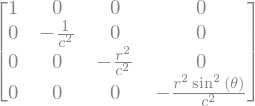

In [13]:
# single substitution
subs1 = sch.subs(a,0)
subs1.tensor()

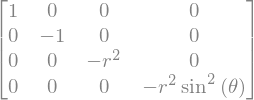

In [14]:
# multiple substitution
subs2 = sch.subs([(a,0), (c,1)])
subs2.tensor()

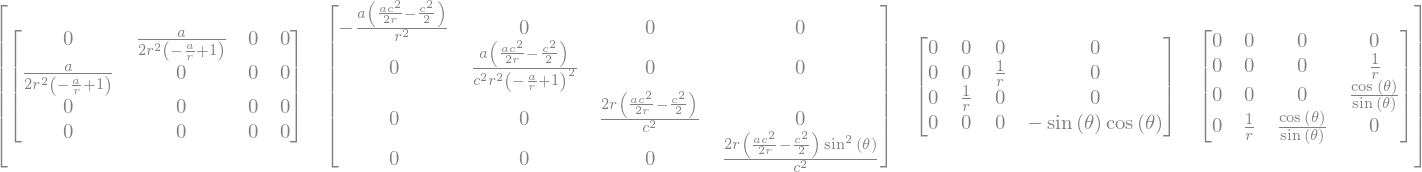

In [15]:
sch_ch = ChristoffelSymbols.from_metric(sch)
sch_ch.tensor()

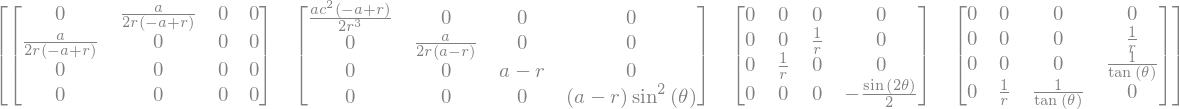

In [16]:
simplified = sch_ch.simplify()
simplified

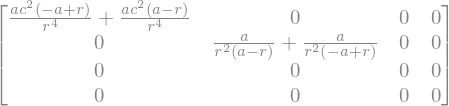

In [19]:
einst = EinsteinTensor.from_metric(sch)
einst.tensor()

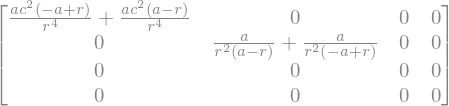

In [23]:
Ric = RicciTensor.from_metric(sch)
Ric.tensor()

In [24]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

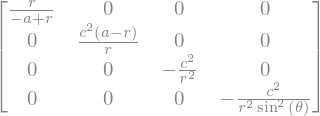

In [29]:
sch.inv().tensor()

In [30]:
sch.config

'll'

In [31]:
sch.order

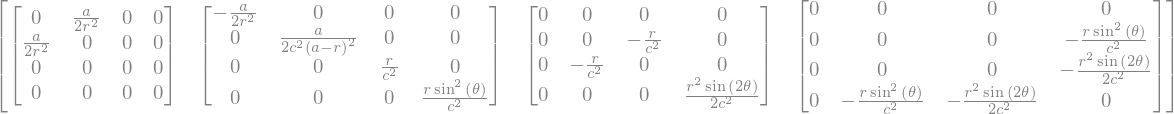

In [33]:
sch_ch.change_config('lll').tensor()

### Weak Field

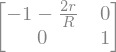

In [2]:
syms = sympy.symbols('t r R')
t, r, R = syms
metric = [[-(1 + 2*r/R), 0], [0, 1]]
g = MetricTensor(metric, (t, r))
g.tensor()

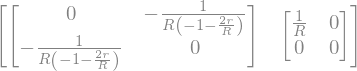

In [3]:
ChristoffelSymbols.from_metric(g).tensor()

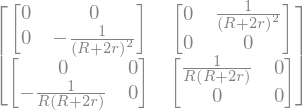

In [4]:
RiemannCurvatureTensor.from_metric(g).tensor()

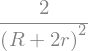

In [6]:
RicciScalar.from_metric(g).tensor()

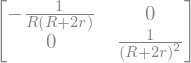

In [7]:
RicciTensor.from_metric(g).tensor()

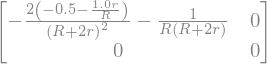

In [8]:
EinsteinTensor.from_metric(g).tensor()

# Example

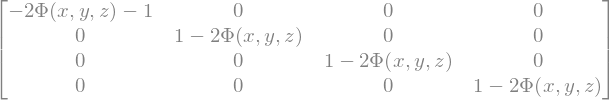

In [9]:
syms = sympy.symbols('t x y z')
t, x, y, z = syms
Phi = sympy.Function('Phi')(x, y, z)
metric = [[-(1 + 2*Phi), 0, 0, 0], [0, (1 - 2*Phi), 0, 0], [0, 0, (1 - 2*Phi), 0], [0, 0, 0, (1 - 2*Phi)]]
g = MetricTensor(metric, syms)
g.tensor()

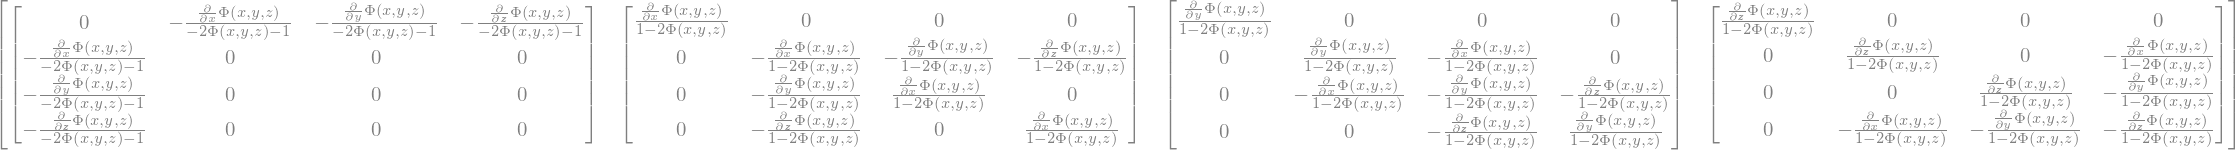

In [11]:
christoffels = ChristoffelSymbols.from_metric(g)
christoffels.tensor()

In [13]:
for beta in range(4):
    print(christoffels[beta, 0, 0])

0
Derivative(Phi(x, y, z), x)/(1 - 2*Phi(x, y, z))
Derivative(Phi(x, y, z), y)/(1 - 2*Phi(x, y, z))
Derivative(Phi(x, y, z), z)/(1 - 2*Phi(x, y, z))


In [15]:
#EinsteinTensor.from_metric(g).tensor()

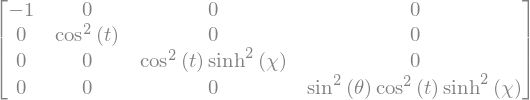

In [22]:
AntiDeSitter().tensor()

## FRW Metric

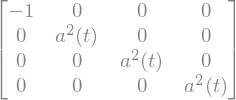

In [2]:
syms = sympy.symbols('t x y z')
t, x, y, z = syms
a = sympy.Function('a')(t)
metric = [[-1, 0, 0, 0], [0, a**2, 0, 0], [0, 0, a**2, 0], [0, 0, 0, a**2]]
g = MetricTensor(metric, syms)
g.tensor()

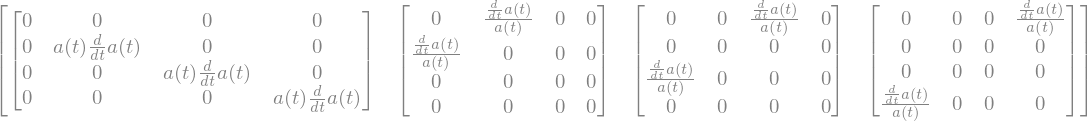

In [25]:
christoffels = ChristoffelSymbols.from_metric(g)
christoffels.tensor()

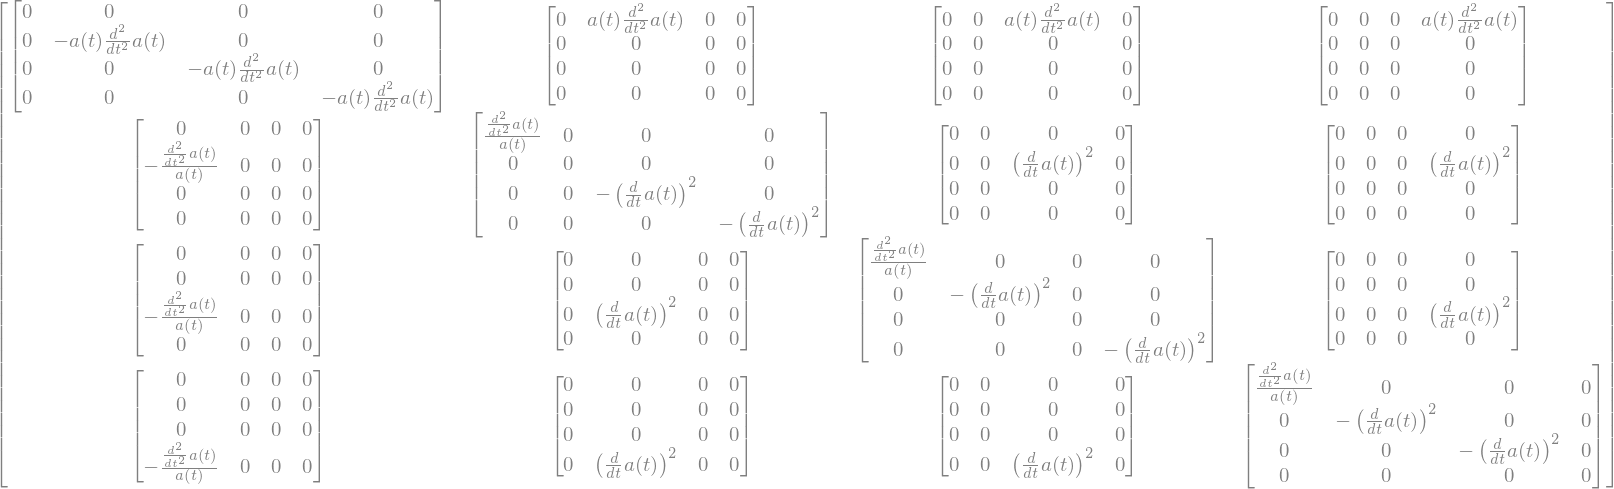

In [26]:
curvature = RiemannCurvatureTensor.from_metric(g)
curvature.tensor()

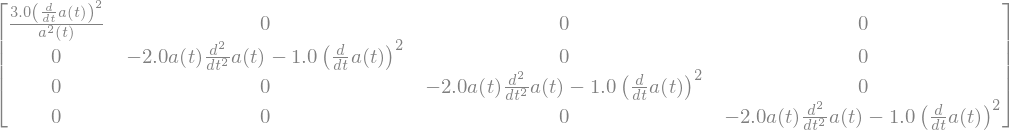

In [18]:
einstein = EinsteinTensor.from_metric(g)
einstein.simplify()

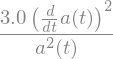

In [6]:
einstein[0,0]

Friedmann Equation (1)
$$3\frac{\dot a^2}{a^2} = 8\pi G T_{00}$$
$$H^2 = \frac{8 \pi G}{3} \rho$$

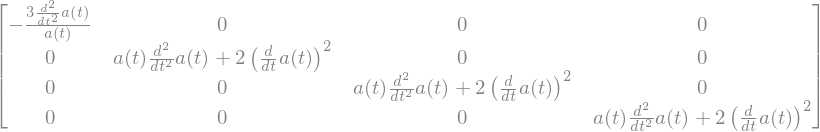

In [15]:
ricci = RicciTensor.from_metric(g)
ricci.tensor()

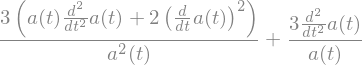

In [36]:
R = RicciScalar.from_riccitensor(ricci)
R.tensor()

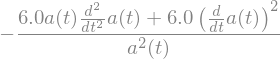

In [33]:
einstein.change_config('ul').tensor().tomatrix().trace().simplify()